In [12]:
!nvidia-smi

Thu Oct  9 14:11:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             29W /   70W |     618MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [14]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Training/Happy/IMG_20220910_201638.jpg')

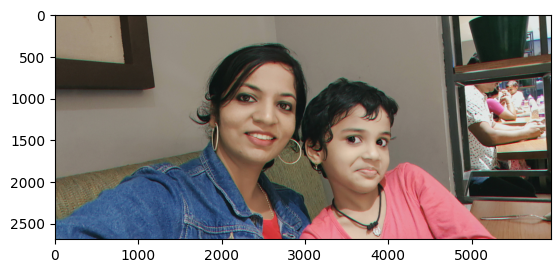

In [15]:
plt.imshow(img)

In [16]:
i1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Training/Happy/IMG_20220910_201638.jpg')
i1

array([[[122, 148, 162],
        [122, 148, 162],
        [121, 147, 161],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       [[122, 148, 162],
        [122, 148, 162],
        [121, 147, 161],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       [[123, 149, 163],
        [122, 148, 162],
        [122, 148, 162],
        ...,
        [228, 231, 229],
        [228, 231, 229],
        [228, 231, 229]],

       ...,

       [[155, 123,  70],
        [155, 123,  70],
        [156, 125,  70],
        ...,
        [ 98, 130, 166],
        [ 97, 129, 165],
        [ 96, 128, 164]],

       [[152, 120,  67],
        [152, 120,  67],
        [153, 122,  67],
        ...,
        [ 99, 131, 167],
        [ 98, 130, 166],
        [ 97, 129, 165]],

       [[150, 118,  65],
        [150, 119,  64],
        [151, 120,  65],
        ...,
        [ 99, 131, 167],
        [ 98, 130, 166],
        [ 98, 130, 166]]

In [17]:
i1.shape

(2688, 5951, 3)

In [18]:
train = ImageDataGenerator(rescale= 1/200)
validation = ImageDataGenerator(rescale = 1/200)

In [19]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Training',
                                        target_size = (200,200),
                                        batch_size = 32,
                                        class_mode = 'binary')
validation_dataset =  validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Validations',
                                        target_size = (200,200),
                                        batch_size = 32,
                                        class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [24]:
model_fit = model.fit(train_dataset, epochs = 15)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6000 - loss: 0.6837
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - accuracy: 0.7000 - loss: 23.1381
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step - accuracy: 0.3000 - loss: 4.7555
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step - accuracy: 0.7000 - loss: 1.9652
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 1.0000 - loss: 0.6141
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - accuracy: 0.7000 - loss: 0.5373
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - accuracy: 1.0000 - loss: 0.5100
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step - accuracy: 0.7000 - loss: 0.4869
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 1.0000 - loss: 0.4166
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - accuracy: 0.7000 - loss: 0.4808
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step - accuracy: 1.0000 - loss: 0.4257
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - accuracy: 0.7000 - loss

In [26]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

IMG_6189.JPG
20241004_224946.jpg
20250523_011858.jpg
20250523_013009.jpg
IMG_20230609_140456.jpg
IMG_20230421_183336~2.jpg
IMG_20230325_113921.jpg
IMG_20220910_201638.jpg
IMG_20220602_212350.jpg
IMG-20220608-WA0050.jpg


In [27]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Testing'
for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+'//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
dir_path = r'/content/drive/MyDrive/Colab Notebooks/CNN Happy or Sad/Testing'
for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+'//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis = 0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
        print('i am happy')
  else:
        print('i am not happy')

Output hidden; open in https://colab.research.google.com to view.

In [32]:
!nvidia-smi

Thu Oct  9 14:38:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             32W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----